# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [478]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as mticker
# Your Code Here

#Configuracion de los graficos.
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [353]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')

ft = fitbit.copy()

In [354]:
ft.shape

(367, 24)

In [349]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [355]:
ft.isnull().sum()

Date                          0
Calorie burned                0
Steps                         0
Distance                      0
Floors                        0
Minutes Sedentary             0
Minutes Lightly Active        0
Minutes Fairly Active         0
Minutes Very Active           0
Activity Calories             0
MinutesOfSleep                0
MinutesOfBeingAwake           0
NumberOfAwakings              0
LengthOfRestInMinutes         0
Distance_miles                0
Days                          0
Days_encoded                  0
Work_or_Weekend               0
Hours Sleep                   0
Sleep efficiency              0
Yesterday_sleep               0
Yesterday_sleep_efficiency    0
Months                        0
Months_encoded                0
dtype: int64

In [356]:
ft.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [357]:
ft.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000000,2974.000000,3233.000000,4351.000000
Steps,367.0,10121.588556,5594.836225,0.000,6730.500000,10413.000000,13916.500000,26444.000000
Distance,367.0,8.549128,3.409881,0.000,6.155000,8.290000,10.560000,20.450000
Floors,367.0,11.724796,10.337370,0.000,5.000000,11.000000,16.000000,101.000000
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000000,663.000000,756.500000,998.000000
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000000,226.000000,290.000000,472.000000
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000000,24.000000,41.500000,101.000000
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500000,29.000000,54.000000,153.000000
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500000,1553.000000,1927.500000,9830.000000
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000000,337.000000,400.500000,553.000000


In [362]:
ft.mean()

/var/folders/xt/vx2zkv116hb1jvz92s1nlr2r0000gn/T/ipykernel_32304/2845584780.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ft.mean()


Calorie burned                 2741.501362
Steps                         10121.588556
Distance                          8.549128
Floors                           11.724796
Minutes Sedentary               563.934482
Minutes Lightly Active          236.405995
Minutes Fairly Active            26.163488
Minutes Very Active              35.722071
Activity Calories              2044.147139
MinutesOfSleep                  290.479564
MinutesOfBeingAwake              28.008174
NumberOfAwakings                 16.196185
LengthOfRestInMinutes           321.343324
Distance_miles                    5.312180
Days_encoded                      3.010899
Work_or_Weekend                   0.713896
Hours Sleep                       4.841326
Sleep efficiency                 76.362799
Yesterday_sleep                   4.818529
Yesterday_sleep_efficiency       76.119842
Months_encoded                    6.501362
dtype: float64

In [361]:
ft.sample()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
327,2016-03-29,2648,9781,7.34,12,1.23,139,6,39,1009,...,4.560863,Tuesday,1.0,1,0.0,0.0,0.0,0.0,March,3


In [363]:
ft.Steps.mean()

10121.58855585831

In [364]:
ft['Steps'].min()

0

In [365]:
ft['Steps'].max()

26444

In [366]:
ft['Steps'].mean()

10121.58855585831

In [367]:
ft['Steps'].std()

5594.836225028932

In [373]:
ft.Steps.value_counts()

0        3
852      2
17913    2
14577    2
1065     2
        ..
11689    1
1033     1
12229    1
10757    1
9526     1
Name: Steps, Length: 360, dtype: int64

In [ ]:
ft.columns #Atributo de instancia. Observo que las columnas estan sucias...

In [384]:
newcols = [columna.replace(" ", "_").lower() for columna in ft.columns] #Sustituyo directamente el nombre de las columnas, machacando el atributo de intancia.

In [386]:
ft.columns = newcols

In [388]:
ft.sample()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
303,2016-03-05,2228,3103,2.31,1,1.042,155,0,0,5720,...,1.435367,Saturday,5.0,0,5.033333,92.923077,2.616667,94.011976,March,3


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [402]:
ft.sample(6)

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
90,2015-08-06,3472,14652,10.89,26,562.0,350,42,20,2079,...,6.766730,Thursday,3.0,1,0.000000,0.000000,6.916667,88.865096,August,8
45,2015-06-22,3088,12713,9.48,59,631.0,225,24,44,1533,...,5.890597,Monday,0.0,1,6.216667,87.353630,6.316667,86.529680,June,6
265,2016-01-28,3092,10707,7.96,10,753.0,262,57,18,1592,...,4.946113,Thursday,3.0,1,5.650000,87.823834,7.633333,87.907869,January,1
195,2015-11-19,3092,11927,8.86,9,726.0,305,21,37,165,...,5.505347,Thursday,3.0,1,8.733333,94.244604,0.000000,0.000000,November,11
50,2015-06-27,3022,11655,8.66,10,670.0,220,28,53,1491,...,5.381073,Saturday,5.0,0,6.466667,87.387387,7.733333,92.246521,June,6
219,2015-12-13,2787,7055,5.24,2,690.0,248,19,6,1182,...,3.255984,Sunday,6.0,0,0.000000,0.000000,3.866667,95.473251,December,12


In [447]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
plot1 = ft['steps'].groupby(ft['months_encoded']).mean()
plot_c = plot1.copy()
plot_m = pd.DataFrame(plot_c)
plot_m['months'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plot_f = plot_m.set_index('months')

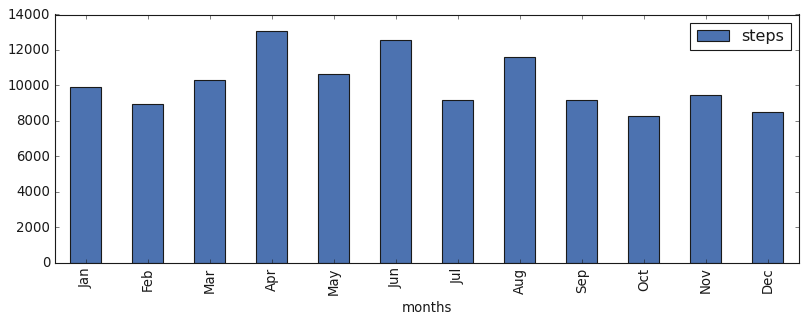

In [698]:
plot_f.plot(kind='bar')
mpl.rcParams['figure.figsize'] = [12.0, 4.0]
p

In [463]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here

plot2 = ft['steps'].groupby(ft['work_or_weekend']).mean()
plot_w = plot2.copy()
plot_work = pd.DataFrame(plot_w)
plot_work['week'] = ['weekend','week']
plot_final = plot_work.set_index('week')
plot_final

,steps
week,
weekend,10064.238095
week,10144.572519


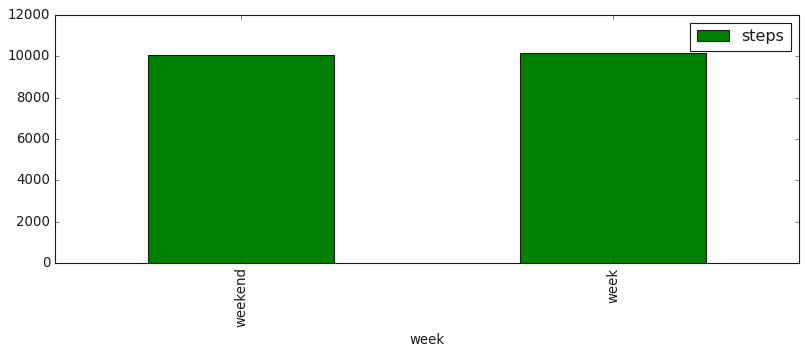

In [710]:

plot_final.plot(kind='bar',color = 'green');

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [467]:
# your code here


In [700]:
ft.sample()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
22,2015-05-30,417,21479,15.98,16,503.0,230,55,153,2794,...,9.929509,Saturday,5.0,0,5.466667,85.863874,7.733333,92.246521,May,5


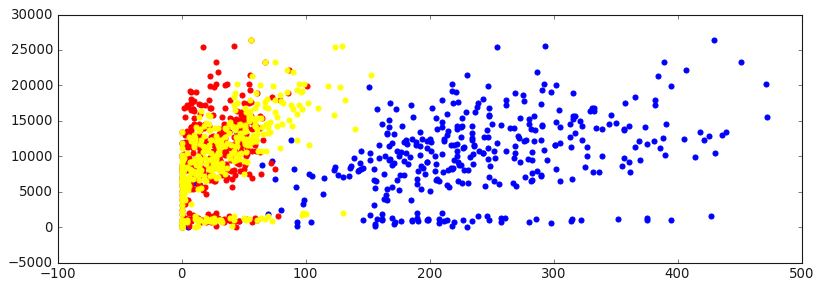

In [706]:
lista = ['minutes_lightly_active','minutes_fairly_active','minutes_very_active']
colors = ['blue','red','yellow']

for t,j in zip(lista,colors):
    plt.scatter(x=t, y=steps, data=ft , color=j)
    
    
    


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [520]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')


#### Explore the titanic dataset using Pandas dtypes.

In [521]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [533]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include =('float','int')).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [527]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include="object").head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


In [537]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [540]:
new_clos = [colus.lower() for colus in titanic.columns]

In [541]:
titanic.columns = new_clos

In [543]:
titanic.sample()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
700,701,1.0,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [596]:
# your code here
mpl.style.use('classic')
mpl.rcParams['figure.figsize'] = [12.0, 6.0]

In [597]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina' 

#### Use the right visulalization to show the distribution of column `Age`.

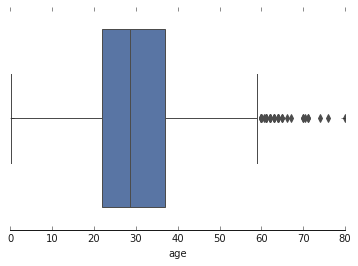

In [616]:
# your code here
sns.boxplot(x="age", data=titanic)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True);


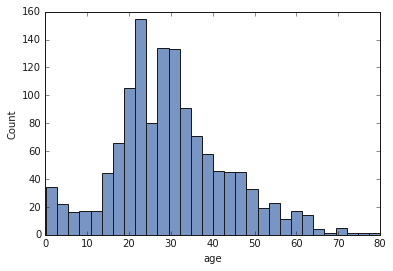

In [613]:
sns.histplot(data=titanic, x= "age");

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

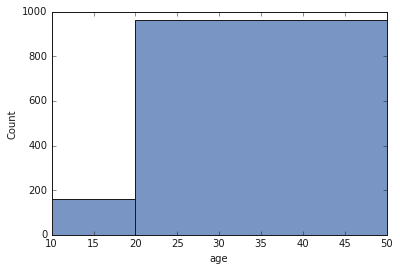

In [612]:
# your code here
bn = [10,20,50]
sns.histplot(data=titanic, x= "age", bins=bn);

#### How does the bin size affect your plot?

In [608]:
"""
Limita el el rango de edades. Aunque no utilice un subplot.

"""


'\nLimita el el rango de edades. Aunque no utilice un subplot.\n\n'

#### Use seaborn to show the distribution of column `Age`.

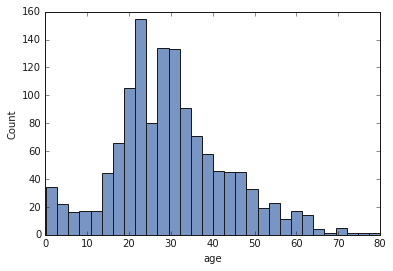

In [611]:
# your code here
sns.histplot(x=titanic.age, bins=30);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

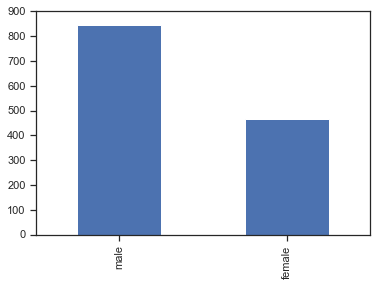

In [586]:
# Method 1 - matplotlib
# your code here
m1 = titanic['gender'].value_counts()
m1.plot(kind="bar")

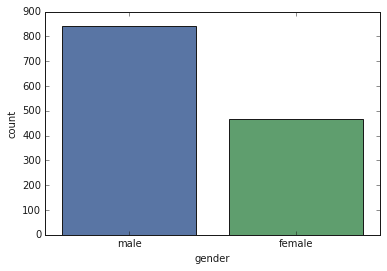

In [618]:
# Method 2 - seaborn
# your code here
sns.countplot(x=titanic.gender);

#### Use the right plot to visualize the column `Pclass`.

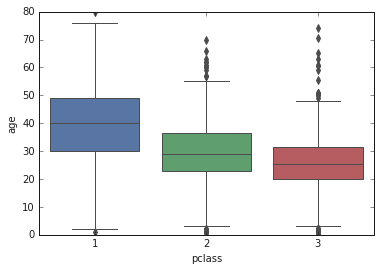

In [617]:
# your code here
sns.boxplot(x="pclass", y="age", data=titanic);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [633]:
st_age = titanic.groupby("age").agg({"age": "mean","age": "min", "age": "max","age":"std" })

In [ ]:
sns.scatterplot(st_age)

In [ ]:
"""
Decidí utilizar un histplot, pues permite visuualizar claramente, no solo la distribucion de la edad sino tambien mostrar los datos estadisticos.

"""


#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Se puede apreciar que el rango de edad que mas abundaba en el titanic seria desde los 15 años a los 50 años, el segundo rango mas abundante se puede ver que seria los mas jóvenes desde 0 años hasta 15 años, por ultimo estaria el rango menos abundante a partir de los 60 años hasta los 80 años. 
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

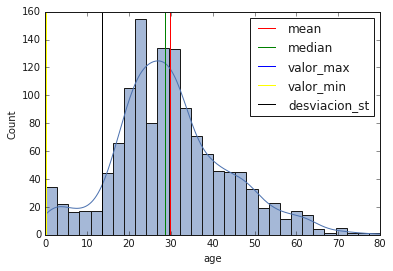

In [652]:
# your code here
graf = sns.histplot(x=titanic.age, kde=True) 
graf.axvline(x=titanic.age.mean(), c="red", label="mean")
graf.axvline(x=titanic.age.median(), c="green", label="median")
graf.axvline(x=titanic.age.max(), c="blue", label="valor_max")
graf.axvline(x=titanic.age.min(), c="yellow", label="valor_min")
graf.axvline(x=titanic.age.std(),c="black",label='desviacion_st')
plt.legend();

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
permite visuualizar claramente, no solo la distribucion de la edad sino tambien mostrar los datos estadisticos.

"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [672]:
# Method 1 - matplotlib
# your code here


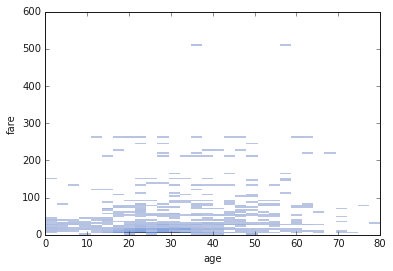

In [671]:
# Method 2 - seaborn
# your code here
sns.histplot(data=titanic, x= "age", y="fare");

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here


#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

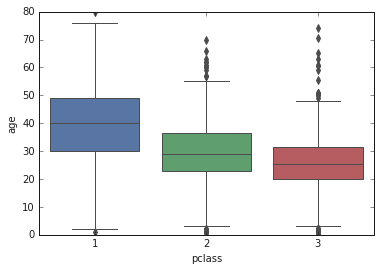

In [674]:
# your code here
sns.boxplot(x="pclass", y="age", data=titanic);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [690]:
# your code here
AG = titanic['age'].groupby(titanic['gender'])

In [693]:
pf = pd.DataFrame(AG)
pf

,0,1
0,female,1 38.000000 2 26.000000 3 35...
1,male,0 22.000000 4 35.000000 5 23...
